## Introduction

Welcome to my Pandas Data Cleaning project. I have been researching different methods to clean raw data in Python and I thought I would make a cumulitive project displaying all the techniques I have learned. Throughout this project I will go over:

1. What is this first steps to cleaning a dataset when I first recieve it

- When recieving a data set for the first time, it is important to learn as much as possible about it. Before starting to clean the data it is important to know key factors such as the data types, column names, and the version of Python that is currently being used. Knowing all these factors will make cleaning the dataset easier by providing informaiton I can reference in the future


2. Dealing with nulls


3. Common Practices for Cleaning Data


4. Modeling Data for a Linear Regression


##### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Initial Data Exploration

##### Reading in the Data

In [2]:
df = pd.read_csv('Bicycle_Routes_Across_New_York_State.csv')

##### Checking Pandas version
This is key to do in case I come across an error. I can check if this error in native to the specific version I'm on

In [3]:
pd.__version__

'1.1.3'

##### Checking Data Types
There is only one numerical column in this dataset so I wanted to check if it was properly formatted. This is key if I want to create an average length or preform other operations on the Length column. For this data set there isn't a ton of data I want to operate on but, this is an important function for datasets with dates and multiple numeric column that may need to be formatted differently. 

I can see that Length is formatted as a Float which means I don't have to make any adjustments.

In [4]:
df.dtypes

Name            object
Description     object
Length         float64
Biking          object
Skiing          object
Horseriding     object
Skating         object
Walking         object
ATV             object
Snowmobile      object
Usage           object
Highway         object
Paved           object
Gravel          object
Stone Dust      object
Dirt            object
Boardwalk       object
SurfaceTyp      object
dtype: object

##### Looking at the Head

Looking at the head of the data allows me to get a quick snapshot of the first couple rows. My initial observations are that two columns (Usage and Surface Type) contain a list of variables within the one cell. This will have to be broken up into Usage 1 and 2. I also noticed that the Surafce Type column is mispelled. It looks like there are quite a few null values. Despite there being nulls it looks like there is a Yes or No option for the different categories. To me, this means there is no data on whether it is, for example, an ATV path. This may be cause for additional research as both NaN and No may mean no.

In [5]:
df.head(10)

,Name,Description,Length,Biking,Skiing,Horseriding,Skating,Walking,ATV,Snowmobile,Usage,Highway,Paved,Gravel,Stone Dust,Dirt,Boardwalk,SurfaceTyp
0,NY 65 Clover Street BIcycle Route,NY 65 Clover Street is signed as an on-road bi...,8.10,Y,NaN,Y,Y,Y,NaN,NaN,"Walking, Biking, Skating, Horse Riding",Shoulder Lane,Y,NaN,NaN,NaN,NaN,Paved
1,Lake Ontario State Parkway,The Lake Ontario State Parkway is a 35.05 mile...,35.05,Y,NaN,NaN,NaN,NaN,NaN,NaN,Biking,Shoulder Lane,Y,NaN,NaN,NaN,NaN,Paved
2,State Bike Route 25,NY 25 State Bike Route begins at the intersect...,67.00,Y,NaN,NaN,NaN,NaN,NaN,NaN,Biking,Shared Roadway,Y,NaN,NaN,NaN,NaN,Paved
3,State Bike Route 27,State Bicycle Route 27 is a signed on-road bic...,30.00,Y,NaN,NaN,NaN,NaN,NaN,NaN,Biking,Shared Roadway,Y,NaN,NaN,NaN,NaN,Paved
4,Hempstead Lake State Park,Hempstead Lake State Park is a multi use facil...,3.00,Y,Y,Y,NaN,Y,NaN,NaN,"Walking, Biking, Horse Riding, Skiing",Off Road,Y,NaN,NaN,NaN,NaN,Paved
5,US Route 11 and Black River Trail,The Black River Trail is a NY State Scenic Byw...,NaN,Y,Y,Y,Y,N,N,N,"Biking, Skating, Horse Riding, Skiing",Shared Roadway,Y,N,N,N,N,Paved
6,Olympic Trail,The Olympic Trail is a NY State Scenic Byway t...,170.00,Y,Y,Y,Y,NaN,NaN,NaN,"Biking, Skating, Horse Riding, Skiing",Shared Roadway,Y,Y,Y,NaN,NaN,"Paved, Gravel, Stone Dust"
7,Adirondack Trail,The Adirondack Trail is a NY State Scenic Bywa...,188.00,Y,Y,Y,Y,NaN,NaN,NaN,"Biking, Skating, Horse Riding, Skiing",Off Road,Y,Y,NaN,Y,NaN,"Paved, Gravel, Dirt"
8,State Bike Route 19,"State Bicycle Route 19 is a signed, on-road bi...",109.00,Y,NaN,NaN,NaN,NaN,NaN,NaN,Biking,Shared Roadway,Y,NaN,NaN,NaN,NaN,Paved
9,State Bike Route 14,"State Bicycle Route 14 is a signed, on-road bi...",95.00,Y,NaN,NaN,NaN,NaN,NaN,NaN,Biking,Shared Roadway,Y,NaN,NaN,NaN,NaN,Paved


##### Looking at the Columns

Observing the columns is important to indetify any spelling or formatting inconsistencies. Sometimes there is an extra space in a column name.

In [6]:
df.columns

Index(['Name', 'Description', 'Length', 'Biking', 'Skiing', 'Horseriding',
       'Skating', 'Walking', 'ATV', 'Snowmobile', 'Usage', 'Highway', 'Paved',
       'Gravel', 'Stone Dust', 'Dirt', 'Boardwalk', 'SurfaceTyp'],
      dtype='object')

##### Checking the Shape

Looking at the shape gives me a quick note of how many rows and columns are in the dataframe.

In [7]:
df.shape

(173, 18)

##### df.info()

Df.info() is my favorite way to get a quick view on the dataset. All in one line I can see which columns have a lot of null values and see their data types.


In this dataframe there is quite a few columns with a lot of nulls. This is incredibly important for when I want to run a regression. It can tell me which columns may not have enough data to add to the regression

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         173 non-null    object 
 1   Description  173 non-null    object 
 2   Length       171 non-null    float64
 3   Biking       158 non-null    object 
 4   Skiing       40 non-null     object 
 5   Horseriding  19 non-null     object 
 6   Skating      64 non-null     object 
 7   Walking      104 non-null    object 
 8   ATV          2 non-null      object 
 9   Snowmobile   8 non-null      object 
 10  Usage        173 non-null    object 
 11  Highway      173 non-null    object 
 12  Paved        155 non-null    object 
 13  Gravel       14 non-null     object 
 14  Stone Dust   17 non-null     object 
 15  Dirt         21 non-null     object 
 16  Boardwalk    9 non-null      object 
 17  SurfaceTyp   173 non-null    object 
dtypes: float64(1), object(17)
memory usage: 24.5+ KB


##### df.describe()

For numeric columns, df.describe() gives me quick summary stastitics. 


I can see from this that the average length is 27 miles for the 171 trails that have data related to their length. This is also important for regression which I will be going over later. This is where I can see if the data is heavily distributed or is close together.

In [9]:
df.describe()

,Length
count,171.000000
mean,27.649415
std,75.503231
min,0.200000
25%,1.300000
50%,3.000000
75%,11.050000
max,454.000000


##### Looking at a Singular Row

Observing one row lets me see some of the data that appears in the dataset. I often use this to get a view similar to head. 

In [10]:
df.loc[1]

Name                                  Lake Ontario State Parkway
Description    The Lake Ontario State Parkway is a 35.05 mile...
Length                                                     35.05
Biking                                                         Y
Skiing                                                       NaN
Horseriding                                                  NaN
Skating                                                      NaN
Walking                                                      NaN
ATV                                                          NaN
Snowmobile                                                   NaN
Usage                                                     Biking
Highway                                            Shoulder Lane
Paved                                                          Y
Gravel                                                       NaN
Stone Dust                                                   NaN
Dirt                     

### Handling Null Values

In [11]:
df.isnull().any()

Name           False
Description    False
Length          True
Biking          True
Skiing          True
Horseriding     True
Skating         True
Walking         True
ATV             True
Snowmobile      True
Usage          False
Highway        False
Paved           True
Gravel          True
Stone Dust      True
Dirt            True
Boardwalk       True
SurfaceTyp     False
dtype: bool

In [12]:
df.isnull().sum()/df.shape[0]

Name           0.000000
Description    0.000000
Length         0.011561
Biking         0.086705
Skiing         0.768786
Horseriding    0.890173
Skating        0.630058
Walking        0.398844
ATV            0.988439
Snowmobile     0.953757
Usage          0.000000
Highway        0.000000
Paved          0.104046
Gravel         0.919075
Stone Dust     0.901734
Dirt           0.878613
Boardwalk      0.947977
SurfaceTyp     0.000000
dtype: float64

In [13]:
df['Walking'].value_counts()

Y    102
N      2
Name: Walking, dtype: int64

In [14]:
df.loc[df['Walking'] == 'N']

,Name,Description,Length,Biking,Skiing,Horseriding,Skating,Walking,ATV,Snowmobile,Usage,Highway,Paved,Gravel,Stone Dust,Dirt,Boardwalk,SurfaceTyp
5,US Route 11 and Black River Trail,The Black River Trail is a NY State Scenic Byw...,NaN,Y,Y,Y,Y,N,N,N,"Biking, Skating, Horse Riding, Skiing",Shared Roadway,Y,N,N,N,N,Paved
52,Seaway Trail,The Seaway Trail is a National Scenic Byway th...,454.0,Y,Y,Y,Y,N,N,N,"Biking, Skating, Horse Riding, Skiing",Shared Roadway,Y,N,N,N,N,Paved


I want to fill in some of these null values for the various uses that are not given a value. I'm going to have to make some assumptions based on my research in order to fill these values out. After researching the top 10 trails in my dataframe, I made the assumption that although it may be not be labeled, most of these trails were able to be walked on. As seen above, there are only 2 trails cannot be walked on according to the data. After researching both these trails, one could walk on them if they so choose to. Based on all this. I am going to fill in the NaNs in the Walking Column with Y's to complete the data. For the rest of the Usage parameters, I am going to fill in the NaNs with N's because these Usages are more likely to not be listed because you cannot phsyically do them on the trail. While one may be able to skate ona trail, it may not be reccomended because of the space alotted. 

Source: https://www.dot.ny.gov/display/programs/scenic-byways/blackriver

In [15]:
df['Walking'].fillna(value='Y', inplace=True)

In [16]:
df['Biking'].fillna(value='N', inplace=True)

In [17]:
df['Snowmobile'].fillna(value='N', inplace=True)
df['Skiing'].fillna(value='N', inplace=True)
df['Horseriding'].fillna(value='N', inplace=True)
df['Skating'].fillna(value='N', inplace=True)
df['ATV'].fillna(value='N', inplace=True)

There is way to this all in one line but, I could not find a way to do it. This something I'll have to research in the future. 

In [18]:
df.isnull().any()

Name           False
Description    False
Length          True
Biking         False
Skiing         False
Horseriding    False
Skating        False
Walking        False
ATV            False
Snowmobile     False
Usage          False
Highway        False
Paved           True
Gravel          True
Stone Dust      True
Dirt            True
Boardwalk       True
SurfaceTyp     False
dtype: bool

### Multiple Variables are Stored in One Column

For this section I will dividing the Usage column into multiple to display a list of usages as Usage 1, Usage 2, and Usage 3

In [19]:
df2 = df['Usage'].str.split(',',n=3,expand=True)

In [20]:
df2

,0,1,2,3
0,Walking,Biking,Skating,Horse Riding
1,Biking,None,None,None
2,Biking,None,None,None
3,Biking,None,None,None
4,Walking,Biking,Horse Riding,Skiing
...,...,...,...,...
168,Walking,Biking,Skating,None
169,Walking,None,None,None
170,Biking,None,None,None
171,Biking,None,None,None


In [21]:
df2.columns = ['Usage{}'.format(x + 1) for x in df2.columns]

In [22]:
df = df.join(df2)

In [23]:
df

,Name,Description,Length,Biking,Skiing,Horseriding,Skating,Walking,ATV,Snowmobile,...,Paved,Gravel,Stone Dust,Dirt,Boardwalk,SurfaceTyp,Usage1,Usage2,Usage3,Usage4
0,NY 65 Clover Street BIcycle Route,NY 65 Clover Street is signed as an on-road bi...,8.10,Y,N,Y,Y,Y,N,N,...,Y,NaN,NaN,NaN,NaN,Paved,Walking,Biking,Skating,Horse Riding
1,Lake Ontario State Parkway,The Lake Ontario State Parkway is a 35.05 mile...,35.05,Y,N,N,N,Y,N,N,...,Y,NaN,NaN,NaN,NaN,Paved,Biking,None,None,None
2,State Bike Route 25,NY 25 State Bike Route begins at the intersect...,67.00,Y,N,N,N,Y,N,N,...,Y,NaN,NaN,NaN,NaN,Paved,Biking,None,None,None
3,State Bike Route 27,State Bicycle Route 27 is a signed on-road bic...,30.00,Y,N,N,N,Y,N,N,...,Y,NaN,NaN,NaN,NaN,Paved,Biking,None,None,None
4,Hempstead Lake State Park,Hempstead Lake State Park is a multi use facil...,3.00,Y,Y,Y,N,Y,N,N,...,Y,NaN,NaN,NaN,NaN,Paved,Walking,Biking,Horse Riding,Skiing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,New York City's Network of Greenways and Pathways,New York City's network of physically separate...,176.00,Y,N,N,Y,Y,N,N,...,Y,Y,Y,Y,Y,"Paved, Gravel, Stone Dust, Dirt, Boardwalk",Walking,Biking,Skating,None
169,New York City Bicycle/Pedestrian Network - Links,These line segments represent links that conne...,38.00,N,N,N,N,Y,N,N,...,Y,NaN,NaN,NaN,NaN,Paved,Walking,None,None,None
170,New York City's Network of Bicycle Lanes,New York City's continually growing network of...,254.00,Y,N,N,N,Y,N,N,...,Y,NaN,NaN,NaN,NaN,Paved,Biking,None,None,None
171,New York City's Network of Shared Bicycle Lanes,New York City's continully expanding network i...,94.00,Y,N,N,N,Y,N,N,...,Y,NaN,NaN,NaN,NaN,Paved,Biking,None,None,None


#### Melt()

Melt is commonly used when data is either too long or too wide to make it easier to process. In this instance, the data is quite wide, spanning 18 columns. I decided to melt this down to lengthen the data and pivot the measure variables to line up with each Name. 

In [24]:
df = df.melt(id_vars='Name')

In [25]:
df

,Name,variable,value
0,NY 65 Clover Street BIcycle Route,Description,NY 65 Clover Street is signed as an on-road bi...
1,Lake Ontario State Parkway,Description,The Lake Ontario State Parkway is a 35.05 mile...
2,State Bike Route 25,Description,NY 25 State Bike Route begins at the intersect...
3,State Bike Route 27,Description,State Bicycle Route 27 is a signed on-road bic...
4,Hempstead Lake State Park,Description,Hempstead Lake State Park is a multi use facil...
...,...,...,...
3628,New York City's Network of Greenways and Pathways,Usage4,None
3629,New York City Bicycle/Pedestrian Network - Links,Usage4,None
3630,New York City's Network of Bicycle Lanes,Usage4,None
3631,New York City's Network of Shared Bicycle Lanes,Usage4,None


## Prepping a Dataset for a Model

In this seciton I will conduct a small example of curating a dataset for a model. To preface, this dataset is on the small side. There is only 54 observations, which is just above the amount I would accept to use in a model. Anything lower than this will result in results with little meaning. Additionally, I have selected this dataset out of passion for the Denver Nuggets. I have conducted multiple Regression Analysis on this team and I throughouhly enjoy analyzing data from my favorite sports team.

#### Scraping Data

I am scraping the data from the popular website Basketball Reference. I enjoy using this site and sites like wikipedia because they have html tables built into the website. This lines up well with Pandas and makes for easy aggregation. Scraping data using APIs is something I am getting into and will conduct more in the future. 

In [26]:
nuggs_table = pd.read_html('https://www.basketball-reference.com/teams/DEN/')

#### First Look at the Data

At first glance, this dataset is fairly organized. I see some columns that can be removed as they repeat obvious information.

In [27]:
nuggs_df = nuggs_table[0]
nuggs_df.head(10)

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Unnamed: 8,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Unnamed: 15,Playoffs,Coaches,Top WS
0,2021-22,NBA,Denver Nuggets,11,11,0.500,2nd of 5,0.97,NaN,95.6,-2.7,108.8,0.1,108.6,-0.1,NaN,NaN,M. Malone (11-11),N. Jokić (3.6)
1,2020-21,NBA,Denver Nuggets*,47,25,0.653,2nd of 5,4.82,NaN,97.1,-2.1,117.1,4.8,112.1,-0.2,NaN,Lost W. Conf. Semis,M. Malone (47-25),N. Jokić (15.6)
2,2019-20,NBA,Denver Nuggets*,46,27,0.630,1st of 5,2.35,NaN,97.1,-3.2,113.1,2.5,111.0,0.4,NaN,Lost W. Conf. Finals,M. Malone (46-27),N. Jokić (9.8)
3,2018-19,NBA,Denver Nuggets*,54,28,0.659,1st of 5,4.19,NaN,97.7,-2.3,113.0,2.6,108.9,-1.5,NaN,Lost W. Conf. Semis,M. Malone (54-28),N. Jokić (11.8)
4,2017-18,NBA,Denver Nuggets,46,36,0.561,5th of 5,1.57,NaN,96.8,-0.5,112.5,3.9,111.0,2.4,NaN,NaN,M. Malone (46-36),N. Jokić (10.7)
5,2016-17,NBA,Denver Nuggets,40,42,0.488,4th of 5,0.70,NaN,98.3,1.9,113.2,4.4,112.7,3.9,NaN,NaN,M. Malone (40-42),N. Jokić (9.7)
6,2015-16,NBA,Denver Nuggets,33,49,0.402,4th of 5,-2.81,NaN,95.7,-0.1,105.6,-0.8,108.9,2.5,NaN,NaN,M. Malone (33-49),N. Jokić (6.7)
7,2014-15,NBA,Denver Nuggets,30,52,0.366,4th of 5,-3.07,NaN,96.1,2.2,104.5,-1.1,108.2,2.6,NaN,NaN,"B. Shaw (20-39), M. Hunt (10-13)",T. Lawson (7.0)
8,2013-14,NBA,Denver Nuggets,36,46,0.439,4th of 5,-1.40,NaN,98.1,4.2,106.0,-0.7,108.2,1.5,NaN,NaN,B. Shaw (36-46),K. Faried (6.5)
9,2012-13,NBA,Denver Nuggets*,57,25,0.695,2nd of 5,5.37,NaN,95.1,3.1,110.4,4.5,105.1,-0.8,NaN,Lost W. Conf. 1st Rnd.,G. Karl (57-25),K. Faried (7.8)


In [28]:
nuggs_df.drop(['Team','Lg','Unnamed: 8','Unnamed: 15'], axis=1, inplace=True)

In [29]:
nuggs_df['WLratio'] = nuggs_df['W/L%']
nuggs_df.drop('W/L%', axis=1, inplace=True)

In [36]:
nuggs_df.head(10)

,Season,W,L,Finish,SRS,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Playoffs,Coaches,Top WS,WLratio
0,2021-22,11,11,2nd of 5,0.97,95.6,-2.7,108.8,0.1,108.6,-0.1,NaN,M. Malone (11-11),N. Jokić (3.6),0.500
1,2020-21,47,25,2nd of 5,4.82,97.1,-2.1,117.1,4.8,112.1,-0.2,Lost W. Conf. Semis,M. Malone (47-25),N. Jokić (15.6),0.653
2,2019-20,46,27,1st of 5,2.35,97.1,-3.2,113.1,2.5,111.0,0.4,Lost W. Conf. Finals,M. Malone (46-27),N. Jokić (9.8),0.630
3,2018-19,54,28,1st of 5,4.19,97.7,-2.3,113.0,2.6,108.9,-1.5,Lost W. Conf. Semis,M. Malone (54-28),N. Jokić (11.8),0.659
4,2017-18,46,36,5th of 5,1.57,96.8,-0.5,112.5,3.9,111.0,2.4,NaN,M. Malone (46-36),N. Jokić (10.7),0.561
5,2016-17,40,42,4th of 5,0.70,98.3,1.9,113.2,4.4,112.7,3.9,NaN,M. Malone (40-42),N. Jokić (9.7),0.488
6,2015-16,33,49,4th of 5,-2.81,95.7,-0.1,105.6,-0.8,108.9,2.5,NaN,M. Malone (33-49),N. Jokić (6.7),0.402
7,2014-15,30,52,4th of 5,-3.07,96.1,2.2,104.5,-1.1,108.2,2.6,NaN,"B. Shaw (20-39), M. Hunt (10-13)",T. Lawson (7.0),0.366
8,2013-14,36,46,4th of 5,-1.40,98.1,4.2,106.0,-0.7,108.2,1.5,NaN,B. Shaw (36-46),K. Faried (6.5),0.439
9,2012-13,57,25,2nd of 5,5.37,95.1,3.1,110.4,4.5,105.1,-0.8,Lost W. Conf. 1st Rnd.,G. Karl (57-25),K. Faried (7.8),0.695


#### Boxplots

Boxplots give a good idea of where the data is distrubuted. Removing outliers is something I do not always do. This depends heavily on the data I am cleaning, the model I want to run, and the results I am seeking. For this example, I want to show the process of removing outliers from the dataset. Despite the data set not having an immense amount of outliers, I will show how I go through and identify what I want to remove.

<AxesSubplot:>

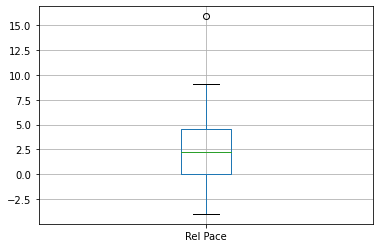

In [31]:
nuggs_df.boxplot('Rel Pace')

<AxesSubplot:>

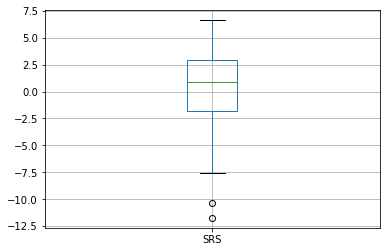

In [32]:
nuggs_df.boxplot('SRS')

#### Removing Outliers

Outliers can distort out stastical analysis of the data. In this case, I determined to alleviate outliers for the Simple Rating System because this stastitic is determind by overall point differential and stregnth of the schedule. The latter cna influence certain seasons immesensly. If strength of schedule is high one year, it could have a drastic effect on the other variables. 

In [33]:
outliers = nuggs_df[(nuggs_df.SRS < nuggs_df.SRS.quantile(.995)) & 
                    (nuggs_df.SRS > nuggs_df.SRS.quantile(.005))]

In [34]:
outliers

,Season,W,L,Finish,SRS,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Playoffs,Coaches,Top WS,WLratio
0,2021-22,11,11,2nd of 5,0.97,95.6,-2.7,108.8,0.1,108.6,-0.1,NaN,M. Malone (11-11),N. Jokić (3.6),0.500
1,2020-21,47,25,2nd of 5,4.82,97.1,-2.1,117.1,4.8,112.1,-0.2,Lost W. Conf. Semis,M. Malone (47-25),N. Jokić (15.6),0.653
2,2019-20,46,27,1st of 5,2.35,97.1,-3.2,113.1,2.5,111.0,0.4,Lost W. Conf. Finals,M. Malone (46-27),N. Jokić (9.8),0.630
3,2018-19,54,28,1st of 5,4.19,97.7,-2.3,113.0,2.6,108.9,-1.5,Lost W. Conf. Semis,M. Malone (54-28),N. Jokić (11.8),0.659
4,2017-18,46,36,5th of 5,1.57,96.8,-0.5,112.5,3.9,111.0,2.4,NaN,M. Malone (46-36),N. Jokić (10.7),0.561
5,2016-17,40,42,4th of 5,0.70,98.3,1.9,113.2,4.4,112.7,3.9,NaN,M. Malone (40-42),N. Jokić (9.7),0.488
6,2015-16,33,49,4th of 5,-2.81,95.7,-0.1,105.6,-0.8,108.9,2.5,NaN,M. Malone (33-49),N. Jokić (6.7),0.402
7,2014-15,30,52,4th of 5,-3.07,96.1,2.2,104.5,-1.1,108.2,2.6,NaN,"B. Shaw (20-39), M. Hunt (10-13)",T. Lawson (7.0),0.366
8,2013-14,36,46,4th of 5,-1.40,98.1,4.2,106.0,-0.7,108.2,1.5,NaN,B. Shaw (36-46),K. Faried (6.5),0.439
9,2012-13,57,25,2nd of 5,5.37,95.1,3.1,110.4,4.5,105.1,-0.8,Lost W. Conf. 1st Rnd.,G. Karl (57-25),K. Faried (7.8),0.695


In [35]:
outliers.shape

(53, 15)